# Exploration

This notebook contains the data exploration done on the dataset. It's aim is to answer the following research question: **TODO**. This is done by generating insightful visualizations, using multiple techniques from the class (e.g. **TODO**), and also extending the dataset with additional relevant data, namely **TODO**.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))

First, let's read the data into a pandas dataframe and inspect the columns. We also set the index to the starttime of the trips.

In [ ]:
trips = pd.read_csv('../data/Trips_2018.csv', index_col=2, parse_dates=True)
trips = trips.sort_index() # Sort the trips in ascending order of the start time
print("Shape:", trips.shape)
print(trips.head(3))

We can get all trips for one day, using the loc method:

In [ ]:
trips.loc['2018-06-01']

Let's see how many unique bikes there are.

In [ ]:
bikes = trips['bikeid'].unique()
print('Number of bikes: ' + str(len(bikes)))

## Number of Trips
Let's plot how many trips were done each day.

In [ ]:
daily_counts = trips.resample('D').size() # Group the trips by day

daily_counts.plot(kind='line')
plt.title('Daily Trip Counts')
plt.xlabel('Date')
plt.ylabel('Number of Trips')
plt.grid(axis='y', linestyle='--')
plt.show()

We can clearly see a difference in the amount of trips done in summer versus in winter. Let's show this relation explicitly by including a dataset with the temperatures in New York. The dataset was downloaded from [Kaggle](https://www.kaggle.com/datasets/aadimator/nyc-weather-2016-to-2022).

In [ ]:
weather = pd.read_csv("../data/NYC_Weather_2016_2022.csv", index_col=0, parse_dates=True)

# Only keep the weather for 2018
weather = weather.loc['2018']

# Compute the average temperature per day
daily_avg_temp = weather['temperature_2m (°C)'].resample('D').mean()

In [ ]:
# Plot daily trip counts (left y-axis)
ax1 = daily_counts.plot(kind='line', color='tab:blue', label='Daily Trip Counts')

# Create a second y-axis (right)
ax2 = ax1.twinx()
daily_avg_temp.plot(kind='line', color='tab:red', label='Avg Temperature (°C)', ax=ax2)

ax1.set_title('Daily Trip Counts vs. Average Temperature (2018)')
ax1.set_xlabel('Date')
ax1.set_ylabel('Number of Trips', color='tab:blue')
ax2.set_ylabel('Avg Temperature (°C)', color='tab:red')
ax1.grid(axis='y', linestyle='--')

# Combine legends
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

plt.show()


The relation between the trip count and the average temperature is very significant.

Let's zoom in on January and February and look for weekly seasonality (highlighting weekend days).

In [ ]:
start = '2018-01'
end = '2018-02'
trips_jan_feb = trips.loc[start:end]

number_trips_jan_feb = trips_jan_feb.resample('D').size()

weekends=number_trips_jan_feb.index.weekday >= 5
colors=['blue' if x else 'red' for x in weekends]

import matplotlib.dates as mdates

fig, ax = plt.subplots()
ax.plot(number_trips_jan_feb)
ax.scatter(number_trips_jan_feb.index, number_trips_jan_feb, marker='o', linestyle='-', c=colors)
ax.set_xlabel('Date')
ax.set_ylabel('Number of Trips')
ax.set_title('Jan-Feb 2018 Number of Trips')

# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

In general, we can see that during the weekends (blue dots) the amount of trips lower than during the rest of the week.

## Trip Duration
This section looks at the _tripduration_ column, as well as looking at the distribution of the _starttime_.

Average trip duration per month:

In [ ]:
trip_duration_monthly = trips[['tripduration']].resample('ME').mean()
trip_duration_monthly = trip_duration_monthly.set_index(trip_duration_monthly.index.month)
trip_duration_monthly.columns = ['Average Duration (sec)']

ax = trip_duration_monthly.plot.bar()
ax.set_ylabel('Trip Duration')
ax.set_xlabel('Month')
ax.set_title('Average trip duration per month')
plt.xticks(rotation=0)
plt.show()

From this plot there is a clear relation between the summer months and the average duration of trips.

Now, let's look at the distribution of the start time of trips.

In [ ]:
import matplotlib.ticker as mticker

start = '2018-01'
end = '2018-02'
trips_jan_feb = trips.loc[start:end]

# Sample the data
sampling_rate = 25  # Keep 1 out of every 25 rows
trips_jan_feb = trips_jan_feb.iloc[::sampling_rate].copy()

trips_jan_feb['time_of_day'] = (
    trips_jan_feb.index.hour +
    trips_jan_feb.index.minute / 60 +
    trips_jan_feb.index.second / 3600
)

trips_jan_feb = trips_jan_feb.reset_index()

ax = trips_jan_feb.plot.scatter(
    x='starttime',
    y='time_of_day',
    alpha=0.2,
    s=1,
    figsize=(10, 6)
)
ax.set_xlabel('Date')
ax.set_ylabel('Time of Day (fractional hours)')
ax.set_title('Trip Start Times by Day')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

ax.yaxis.set_major_locator(mticker.MultipleLocator(1))
ax.set_ylim(0, 24)

plt.xticks(rotation=75, ha='right')
ax.xaxis.set_major_locator(mticker.MultipleLocator(2))

plt.show()

## Users
This section looks at the users; _usertype_, _birth_year_, and _gender_. It aims to create an understanding of Citibike's users.

In [ ]:
user_type = trips['usertype']
print(user_type.value_counts())
print()

gender = trips['gender']
print(gender.value_counts())

Let's create a barplot of the birth year column:

In [ ]:
birth_year = trips['birth_year']
print('Min: ' + str(birth_year.min()))
print('Max: ' + str(birth_year.max()))

# Plot for all birth years
ax = birth_year.value_counts().sort_index().plot.bar(figsize=(12, 6))
ax.set_ylabel('Number of trips')
ax.set_xlabel('Birth year')
ax.set_title('Number of trips per Birth year')

plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

# Plot for 1945 and later
ax = birth_year[birth_year >= 1945].value_counts().sort_index().plot.bar(figsize=(12, 6))
ax.set_ylabel('Number of trips')
ax.set_xlabel('Birth Year')
ax.set_title('Number of trips per Birth Year (1945 and later)')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Stations
This section analyses the stations. It aims to answer the following questions:
1. How many stations are there?
2. How to cluster them?
3. What stations are more uncertain in terms of their expected pickups and drop-offs?

In [ ]:
# Create a dataframe of the unique stations:
# Select and rename columns for start stations
start_stations_df = trips[[
    'start_station_id',
    'start_station_latitude',
    'start_station_longitude'
]].rename(columns={
    'start_station_id': 'station_id',
    'start_station_latitude': 'latitude',
    'start_station_longitude': 'longitude'
})

# Select and rename columns for end stations
end_stations_df = trips[[
    'end_station_id',
    'end_station_latitude',
    'end_station_longitude'
]].rename(columns={
    'end_station_id': 'station_id',
    'end_station_latitude': 'latitude',
    'end_station_longitude': 'longitude'
})

all_stations_df = pd.concat([start_stations_df, end_stations_df])

# Drop duplicates based on the station ID
unique_stations = all_stations_df.drop_duplicates(subset=['station_id']).reset_index(drop=True)

print("Total unique stations identified: "+ str(len(unique_stations)))
print("\nUnique Stations DataFrame (Sample):")
print(unique_stations.head())

Let's create a scatterplot of the latitudes and longitudes of every station, such that we can visually check if there are any logical clusters.

In [ ]:
ax = unique_stations.plot.scatter(
    x='longitude',
    y='latitude',
    s=2,
    figsize=(10, 6)
)
plt.axis('equal')


The stations seem to contain some far away stations, let's remove them to get a closer view.

In [ ]:
unique_stations_sample = unique_stations[unique_stations['latitude'] < 40.85]

ax = unique_stations_sample.plot.scatter(
    x='longitude',
    y='latitude',
    s=2,
    figsize=(10, 6)
)

# Let's highlight a specific point to compare it to a Google Maps screenshot
highlight_lat = 40.7
highlight_lon = -73.975

ax.scatter(
    x=highlight_lon,
    y=highlight_lat,
    color='red',         # Set color to red
    marker='o',          # Use a circle marker
    s=100,               # Set size much larger than the background points
    edgecolors='black',  # Add a black outline for visibility
    label='Highlighted Point'
)

plt.axis('equal')
plt.show()

![image.png](../images/nyc.png)

We can distinguish the shape of New York in the shape of the stations. It's quite easy to spot central park for example.
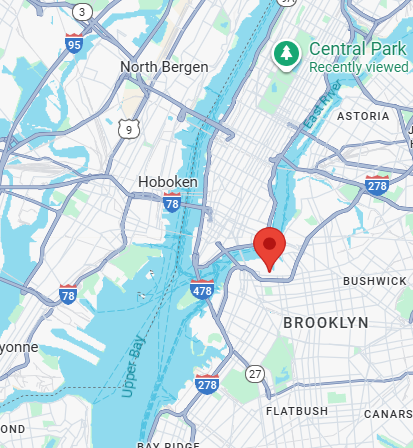